In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import demography as dm

In [249]:
#Colocando os dados em suas respectivas variáveis
ambos_sexos = pd.read_csv('data/data_life_bs.csv')
feminino = pd.read_csv('data/data_life_f.csv')
masculino = pd.read_csv('data/data_life_m.csv')
populacao = pd.read_csv('data/data_pop.csv')
populacao.columns = ['Year', 'Age', 'Feminino', 'Masculino', 'Total']

In [250]:
def tx_de_crescimento(ano_1, ano_2):
    ano_inicial = populacao[populacao['Year'] == ano_1]
    ano_final = populacao[populacao['Year'] == ano_2]
    
    pop_fem_inicial = ano_inicial['Feminino'][(ano_inicial['Age'] == 0)]
    pop_fem_final = ano_final['Feminino'][(ano_final['Age'] == 0)]
    tx_fem_linear = (1/(ano_2-ano_1))*((pop_fem_final.iloc[0] - pop_fem_inicial.iloc[0])/pop_fem_inicial.iloc[0])
    tx_fem_geo = ((pop_fem_final.iloc[0]/pop_fem_inicial.iloc[0])**(1/(ano_2-ano_1))) - 1

    pop_mas_inicial = ano_inicial['Masculino'][(ano_inicial['Age'] == 0)]
    pop_mas_final = ano_final['Masculino'][(ano_final['Age'] == 0)]
    tx_mas_linear = (1/(ano_2-ano_1))*((pop_mas_final.iloc[0] - pop_mas_inicial.iloc[0])/pop_mas_inicial.iloc[0])
    tx_mas_geo = ((pop_mas_final.iloc[0]/pop_mas_inicial.iloc[0])**(1/(ano_2-ano_1))) - 1

    pop_tot_inicial = ano_inicial['Total'][(ano_inicial['Age'] == 0)]
    pop_tot_final = ano_final['Total'][(ano_final['Age'] == 0)]
    tx_tot_linear = (1/(ano_2-ano_1))*((pop_tot_final.iloc[0] - pop_tot_inicial.iloc[0])/pop_tot_inicial.iloc[0])
    tx_tot_geo = ((pop_tot_final.iloc[0]/pop_tot_inicial.iloc[0])**(1/(ano_2-ano_1))) - 1

    #data_linear = pd.DataFrame({'Year': [ano_1, ano_2], 'Feminino': [tx_fem_linear, tx_fem_linear], 'Masculino': [tx_mas_linear, tx_mas_linear], 'Total': [tx_tot_linear, tx_tot_linear]})
    


    data_linear = pd.DataFrame({'Sexo': ['Feminino', 'Masculino', 'Total'], f'Pop_{ano_1}': [pop_fem_inicial.iloc[0], pop_mas_inicial.iloc[0], pop_tot_inicial.iloc[0]], f'Pop_{ano_2}': [pop_fem_final.iloc[0], pop_mas_final.iloc[0], pop_tot_final.iloc[0]], 'Taxa Nominal': [tx_fem_linear, tx_mas_linear, tx_tot_linear], 'Geometrica': [tx_fem_geo, tx_mas_geo, tx_tot_geo]})


    
    return data_linear

In [251]:
taxas_cres = tx_de_crescimento(1992, 2015)
taxas_cres

,Sexo,Pop_1992,Pop_2015,Taxa Nominal,Geometrica
0,Feminino,51891.0,85450.0,0.028118,0.021923
1,Masculino,54402.0,90560.0,0.028898,0.022404
2,Total,106293.0,176010.0,0.028517,0.022170


In [252]:
ano_1 = 2000
ano_2 = 2010
ano_inicial = populacao[populacao['Year'] == ano_1]
ano_final = populacao[populacao['Year'] == ano_2]
pop_fem_inicial = ano_inicial['Feminino'][(ano_inicial['Age'] == 0)]
pop_fem_final = ano_final['Feminino'][(ano_final['Age'] == 0)]
tx_fem_linear = (1/(ano_2-ano_1))*((pop_fem_final.iloc[0] - pop_fem_inicial.iloc[0])/pop_fem_inicial.iloc[0])
print(f'{tx_fem_linear:.2f}%')

0.02%


In [253]:
#função para filtrar a expectativa de vida por dataframe, qunatidade de anos e idades
def expec_vida(data, quant_anos, idade):
    years = list(map(lambda x: -x + data['Year'].max(), range(0, quant_anos)))
    expec = data[(data['Year'].isin(years)) & (data['Age'] == idade)][['Year', 'Age', 'ex']]
    return expec
#função para plotar a expectativa de vida
def plot_expec_vida(data1, data2, sexo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    ax1.grid(True)
    ax1.plot(data1['Year'], data1['ex'], linestyle='-', color='r', marker='o', label='Expectativa de Vida', linewidth=2, markersize=6, markerfacecolor='b', markeredgewidth=2, markeredgecolor='black')
    ax1.set_xlabel('Ano')
    ax1.set_ylabel('Expectativa de Vida')
    ax1.set_title(f'Expectativa de Vida ao nascer - {sexo}')

    ax2.grid(True)
    ax2.plot(data2['Year'], data2['ex'], linestyle='-', color='r', marker='o', label='Expectativa de Vida', linewidth=2, markersize=6, markerfacecolor='b', markeredgewidth=2, markeredgecolor='black')
    ax2.set_xlabel('Ano')
    ax2.set_ylabel('Expectativa de Vida')
    ax2.set_title(f'Expectativa de Vida aos 60 anos - {sexo}')

    plt.tight_layout()
    plt.show()

In [254]:
sexos_exp_0 = expec_vida(ambos_sexos, 20, 0)
sexos_exp_60 = expec_vida(ambos_sexos, 20, 60)
feminino_exp_0 = expec_vida(feminino, 20, 0)
feminino_exp_60 = expec_vida(feminino, 20, 60)
masculino_exp_0 = expec_vida(masculino, 20, 0)
masculino_exp_60 = expec_vida(masculino, 20, 60)


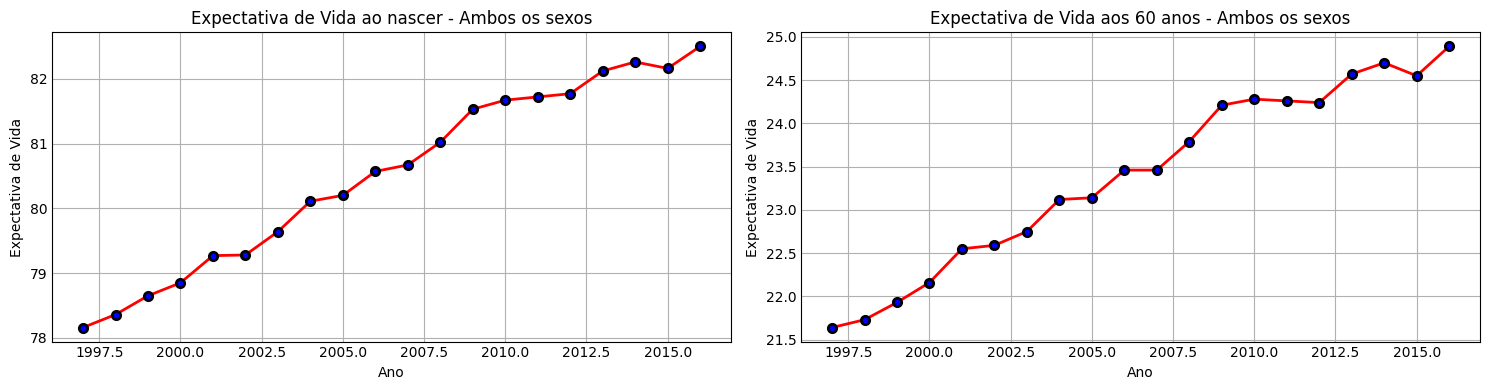

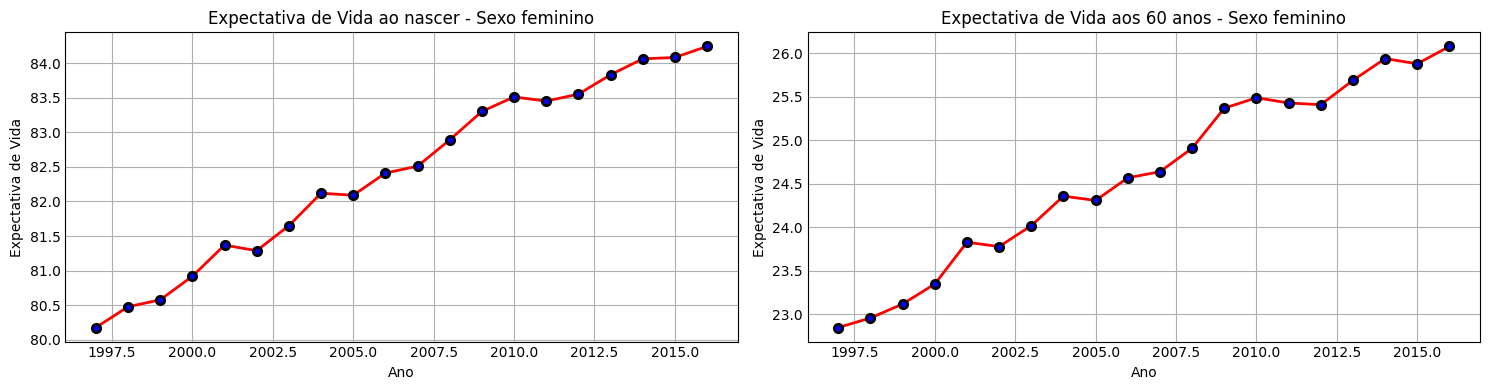

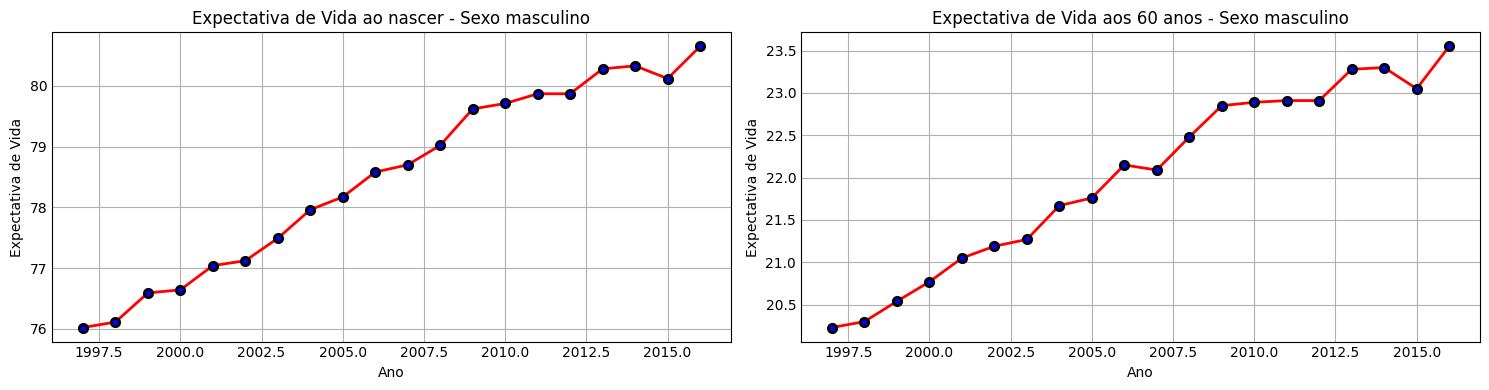

In [255]:
pl_exp_sexos = plot_expec_vida(sexos_exp_0, sexos_exp_60, 'Ambos os sexos')
pl_exp_fem = plot_expec_vida(feminino_exp_0, feminino_exp_60, 'Sexo feminino')
pl_exp_masc = plot_expec_vida(masculino_exp_0, masculino_exp_60, 'Sexo masculino')
pl_exp_sexos
pl_exp_fem
pl_exp_masc

In [256]:
#função para filtrar a probabilidade de morte por dataframe, quantidade de anos e intervalo de anos
def prob_mort_ano(data, quant_anos, intervalo):
    #definindo anos por intervalo de tempo
    years = list(map(lambda x: -x + data['Year'].max(), range(0, quant_anos, intervalo)))
    #definindo idades de 0 a 60 anos
    idade = list(map(lambda x: x, range(0, 61)))
    #extraindo probabilidades do dataframe filtrando por ano e idade definidas anteriormente
    probs = data[(data['Year'].isin(years)) & (data['Age'].isin(idade))][['Year', 'Age', 'qx']]
    return probs
#função para plotar a probabilidade de morte
def plot_prob_mort(data, sexo):
    years = data['Year'].unique()
    plt.figure(figsize=(17, 6))
    plt.grid(False)
    plt.title(f'Probabilidade de Morte em Relação a Idade - {sexo}')
    plt.xlabel('Idade')
    plt.ylabel('Probabilidade de Morte')
    plt.yscale('log')
    for year in years:
        plt.plot(data[data['Year'] == year]['Age'], data[data['Year'] == year]['qx'], linestyle='-', label=year, color=np.random.rand(3,))
    plt.legend(title='Anos', loc='lower right')
    plt.tick_params(axis='x', labelsize=8)
    plt.show()

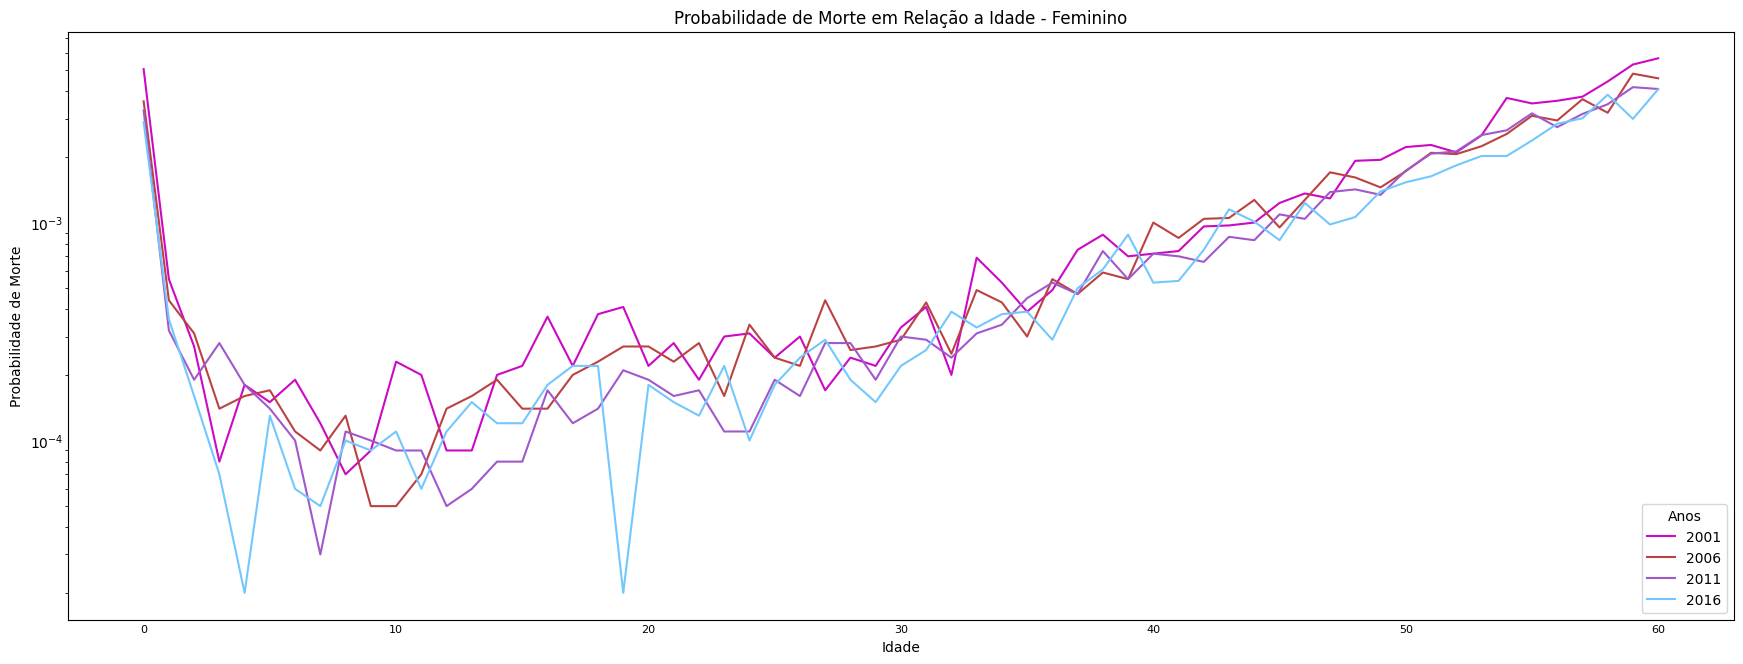

In [257]:
fem = prob_mort_ano(feminino, 20, 5)
prob_mort_fem = plot_prob_mort(fem, 'Feminino')
prob_mort_fem

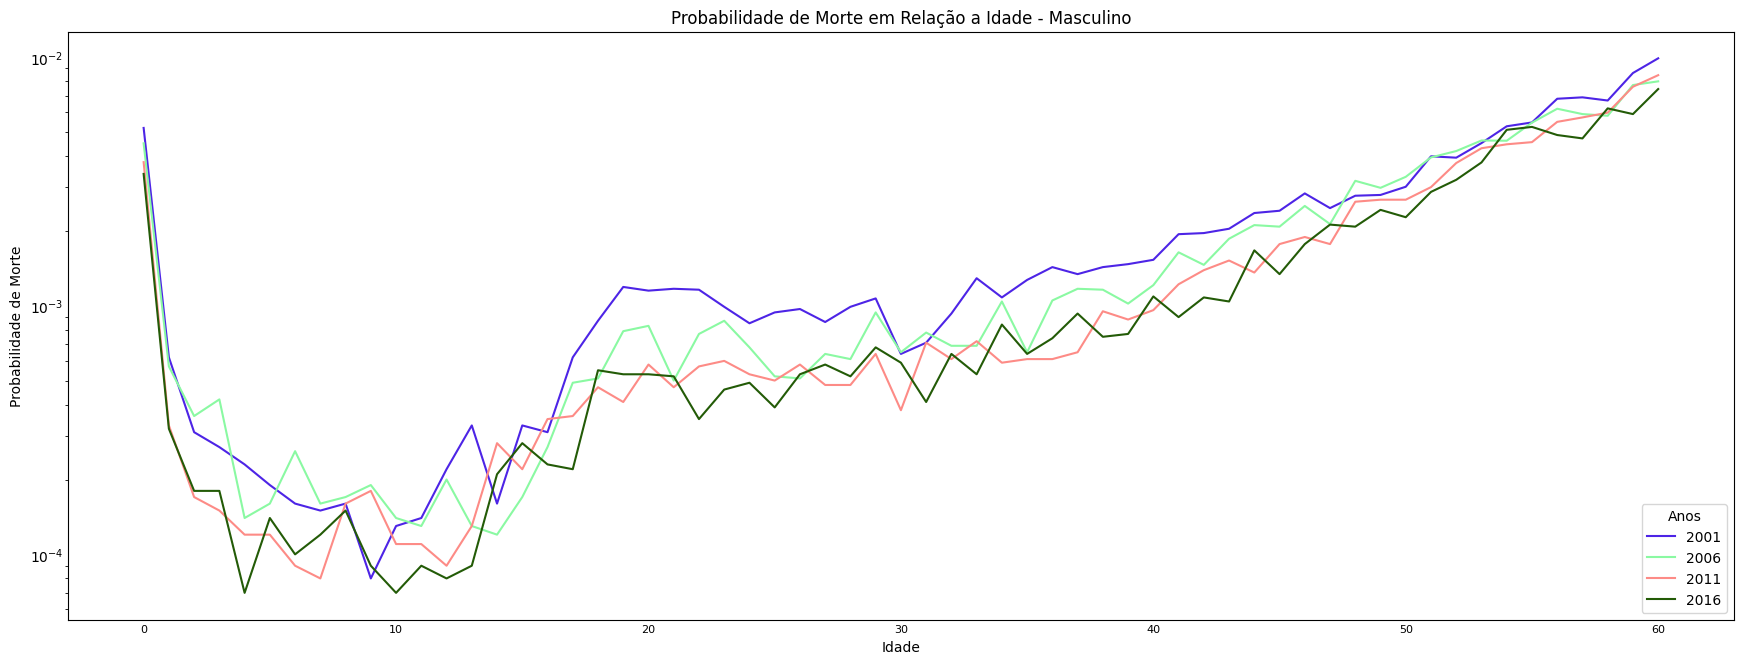

In [258]:
masc = prob_mort_ano(masculino, 20, 5)
prob_mort_masc = plot_prob_mort(masc, 'Masculino')
prob_mort_masc

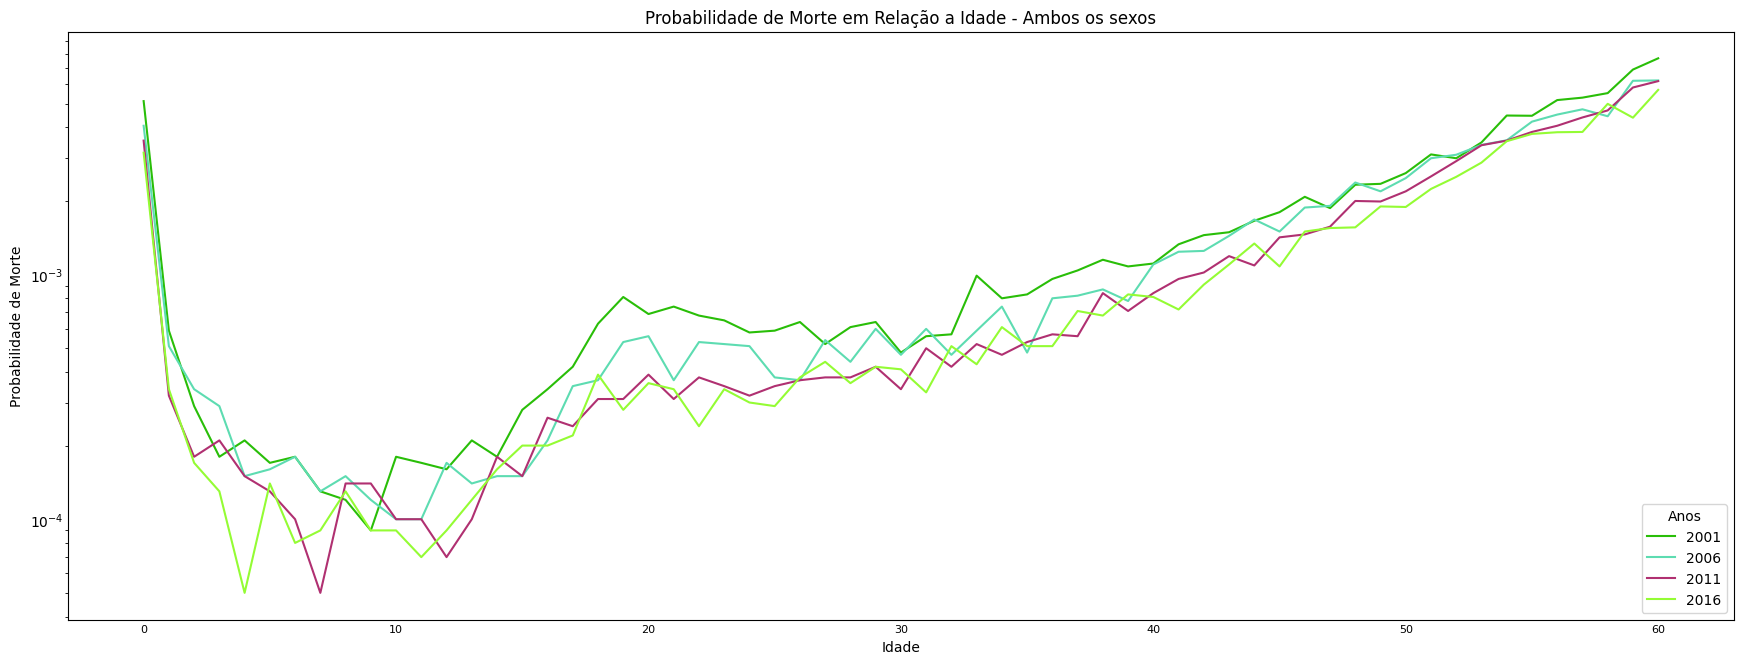

In [259]:
ambos_sex = prob_mort_ano(ambos_sexos, 20, 5)
prob_mort_sex = plot_prob_mort(ambos_sex, 'Ambos os sexos')
prob_mort_sex

In [260]:
#função para plotar a pirâmide etária
def plot_piramide_etaria(quant_ano, intervalo):
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    axs = axs.ravel()

    #definindo intervalo de idade
    idade = list(map(lambda x: x, range(0, len(populacao['Age'].unique()), intervalo)))
    #listando os anos
    years = list(map(lambda x: -x + populacao['Year'].max(), range(0, quant_ano, intervalo)))
    
    #dados para homens
    hm = (populacao[populacao['Year'].isin(years)][['Masculino', 'Age', 'Year']])
    hm = hm[hm['Age'].isin(idade)][['Masculino', 'Year']]
    #dados para mulheres
    fm = (populacao[populacao['Year'].isin(years)][['Feminino', 'Age', 'Year']])
    fm = fm[fm['Age'].isin(idade)][['Feminino', 'Year']]
    #plotando os gráficos em conjunto
    for c in range(0, len(years)):
        masc = hm[hm['Year'] == years[c]]['Masculino']
        fem = fm[fm['Year'] == years[c]]['Feminino']
        
        ax = axs[c]
        ax.barh(idade, masc, color='blue', label='Homens', height=3)
        ax.barh(idade, [-val for val in fem], color='pink', label='Mulheres', height=3)
        
        ax.set_yticks(idade)
        ax.set_xlabel('População')
        ax.set_title(f'Pirâmide Etária - {years[c]}')
        ax.legend()
        ax.tick_params(axis='y', labelsize=6)
        ax.grid(False)
        
        xlim = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
        ax.set_xlim(-xlim, xlim)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

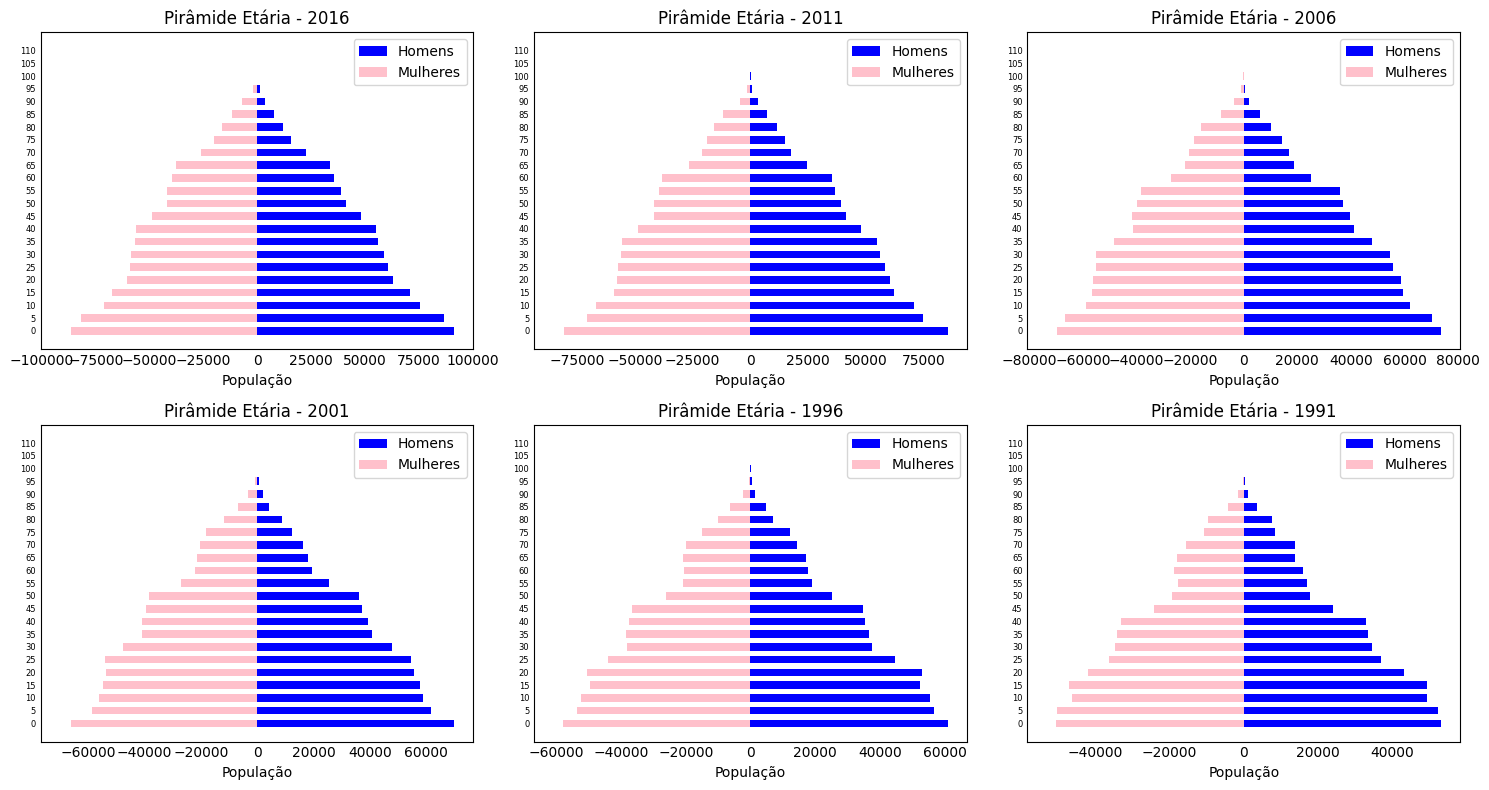

In [261]:
plot_piramide_etaria(30, 5)